# Instructions for running on Imperial HPC from Python

Log into a login node on HPC or onto the HPC JupyterHub (https://jupyter.rcs.imperial.ac.uk/) and open a terminal window.  The instructions below are printed out from my command history.

## Create an anaconda environment

```
bash-4.4$ module load anaconda/personal
bash-4.4$ conda create --name bayesian python=3.8
bash-4.4$ source activate bayesian
(bayesian) bash-4.4$ conda env update --file environment.yml --prune
```

## Download the code
```
(bayesian) bash-4.4$ git clone https://github.com/Cefhalic/BayesianClusters.git Bayesian
(bayesian) bash-4.4$ cd Bayesian/
(bayesian) bash-4.4$ git checkout PythonBindings
```

## Compile the code
```
(bayesian) bash-4.4$ cd Bayesian/
(bayesian) bash-4.4$ make clean
(bayesian) bash-4.4$ make
```

## Test the code.  

Note that this will not produce any graphical output unless there is an X-Windows or another graphical interface.

```
(bayesian) bash-4.4$ python ./python/test.py --cfg config.txt -i /rds/general/project/easystorm/live/bayesian/1_un_red.csv --r 20nm --t 40nm
``` 

## Running the test as a Jupyter notebook

While in a JupyterHub session first set up the conda `bayesian` environment to make the current conda environment available as `bayesian` within Jupyter (the modules should already be included with the environment.yml file above).

```
(bayesian) bash-4.4$ python -m ipykernel install --user --name bayesian --display-name "bayesian"
```

From the `python` subdirectory of the main `Bayesian` source code directory open the `test.ipynb` Jupyter notebook.

Enjoy!

In [1]:
from BayesianClustering import *
from sys import argv
import matplotlib.pyplot as plt

In [2]:
def Callback( clusters , background  ):
    print( "Displaying")

    X , Y = [] , []
    for point in background:
        X.append( point.x )
        Y.append( point.y )

    x, y, colours = [], [], []
    for colour, cluster in enumerate( clusters ) :
        for point in cluster:
            x.append( point.x )
            y.append( point.y )
            colours.append( colour )

    plt.scatter( X, Y, s=0.1 , marker='.' , c="black" )
    plt.scatter( x, y, s=0.1 , marker='.' , c=colours , cmap="prism" )
    plt.show()

In [10]:
Configuration.FromVector( ['--cfg', '../config_zoom.txt', '-i', 
                           '/rds/general/project/easystorm/live/bayesian/1_un_red.csv',
                           '--r', '20nm', '--t', '40nm'])

Alpha: 20
Centre: x=8.7e-05, y=3.19e-05
Pb: 0.2
Zoom: 1e-06
Input file: /rds/general/project/easystorm/live/bayesian/1_un_red.csv
R-bins: 35 bins from 0 to 2e-07 in steps of 5.71429e-09
T-bins: 35 bins from 0 to 5e-07 in steps of 1.42857e-08
Sigma-integral: 5e-09 to 1e-07 in 100 steps


Reading File
Displaying
Read 1915 points
  Completed in 2.66 seconds
Populating neighbourhood
  Completed in 0.036 seconds
Clusterize
GSLInterpolator::Integ: input domain error
GSLInterpolator::Integ: input domain error
GSLInterpolator::Integ: input domain error
  Completed in 0.005 seconds


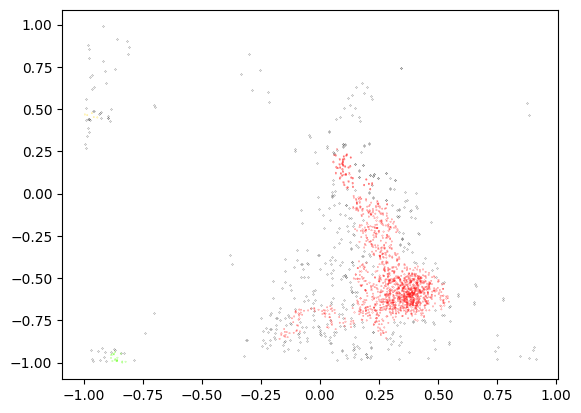

In [11]:
OneStopGetClusters( Callback )

In [5]:
import numpy as np

def Callback2( clusters , background  ):
    print( "Displaying")
    pts = [ len( cluster ) for cluster in clusters ]
    plt.boxplot( pts , labels= ["$Dataset A$"] , widths= 0.8 , showfliers=False , showmeans=True , meanprops=dict(color="grey"), meanline=True, medianprops=dict(color="black") )
    plt.scatter( np.random.normal( 1 , 0.05 , len( pts ) ) , pts , color="r" , alpha=0.5 , s=1 )
    plt.xlabel('x-label')
    plt.ylabel('Cluster size')
    plt.yscale( "log" )
    plt.show()

Alpha: 20
Centre: x=9.75e-05, y=9.09e-05
Pb: 0.2
Displaying
Zoom: 2e-05
Input file: /rds/general/project/easystorm/live/bayesian/1_un_red.csv
R-bins: 35 bins from 0 to 2e-07 in steps of 5.71429e-09
T-bins: 35 bins from 0 to 5e-07 in steps of 1.42857e-08
Sigma-integral: 5e-09 to 1e-07 in 100 steps
Reading File
Read 665253 points
  Completed in 6.48 seconds
Populating neighbourhood
  Completed in 9.881 seconds
Clusterize
  Completed in 2.285 seconds


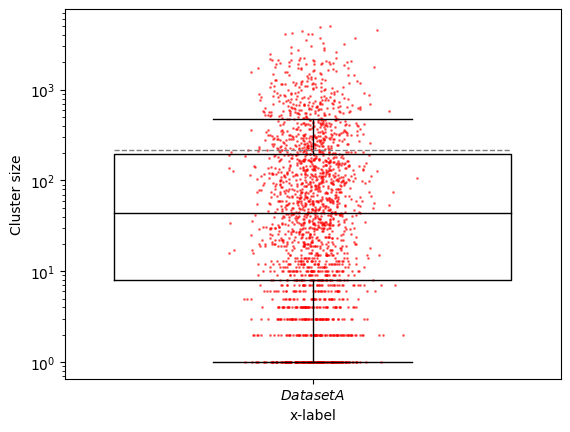

In [13]:
Configuration.FromVector( ['--cfg', '../config.txt', '-i', 
                           '/rds/general/project/easystorm/live/bayesian/1_un_red.csv',
                           '--r', '20nm', '--t', '40nm'] )
OneStopGetClusters( Callback2 )

In [7]:
def Callback3( clusters , background  ):
    print( "Displaying")
    pts = [ len( cluster ) for cluster in clusters ]
    plt.xlabel('Cluster size')	
    plt.ylabel('Count')
    plt.hist( pts , 100, facecolor='green', alpha=0.75)
    plt.show()


Alpha: 20
Centre: x=9.75e-05, y=9.09e-05
Pb: 0.2
Displaying
Zoom: 2e-05
Input file: /rds/general/project/easystorm/live/bayesian/1_un_red.csv
R-bins: 35 bins from 0 to 2e-07 in steps of 5.71429e-09
T-bins: 35 bins from 0 to 5e-07 in steps of 1.42857e-08
Sigma-integral: 5e-09 to 1e-07 in 100 steps
Reading File
Read 665253 points
  Completed in 5.053 seconds
Populating neighbourhood
  Completed in 11.994 seconds
Clusterize
  Completed in 2.385 seconds


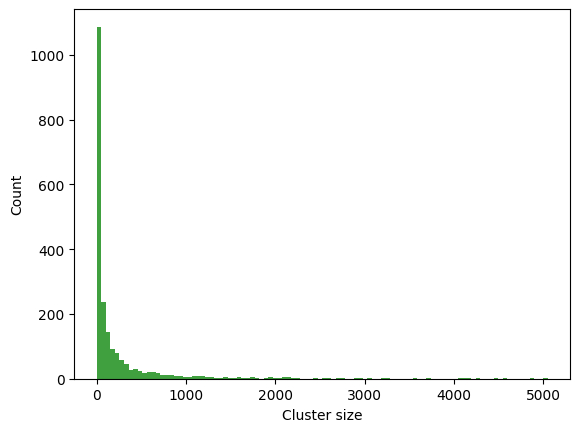

In [14]:
Configuration.FromVector( ['--cfg', '../config.txt', '-i', 
                           '/rds/general/project/easystorm/live/bayesian/1_un_red.csv',
                           '--r', '20nm', '--t', '40nm'] )
OneStopGetClusters( Callback3 )